We will focus on the supervised methods, regression and classification, as evaluating
and selecting models in unsupervised learning is often a very qualitative process To evaluate our supervised models, so far we have split our dataset into a training set
and a test set using the train_test_split function, built a model on the training set
by calling the fit method, and evaluated it on the test set using the score method,
which for classification computes the fraction of correctly classified samples. Here’s
an example of that process:

In [31]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


In [33]:
y

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

Remember, the reason we split our data into training and test sets is that we are inter‐
ested in measuring how well our model generalizes to new, previously unseen data.
We are not interested in how well our model fit the training set, but rather in how
well it can make predictions for data that was not observed during training.
In this notebook, we will expand on two aspects of this evaluation. We will first intro‐
duce cross-validation, a more robust way to assess generalization performance, and
discuss methods to evaluate classification and regression performance that go beyond
the default measures of accuracy and R2 provided by the score method.
We will also discuss grid search, an effective method for adjusting the parameters in
supervised models for the best generalization performance.

# Cross-Validation
Cross-validation is a statistical method of evaluating generalization performance that
is more stable and thorough than using a split into a training and a test set. In crossvalidation, the data is instead split repeatedly and multiple models are trained. The
most commonly used version of cross-validation is k-fold cross-validation, where k is
a user-specified number, usually 5 or 10. When performing five-fold cross-validation,
the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy. In the end, we have collected five accuracy values. The process is illustrated
in figure below

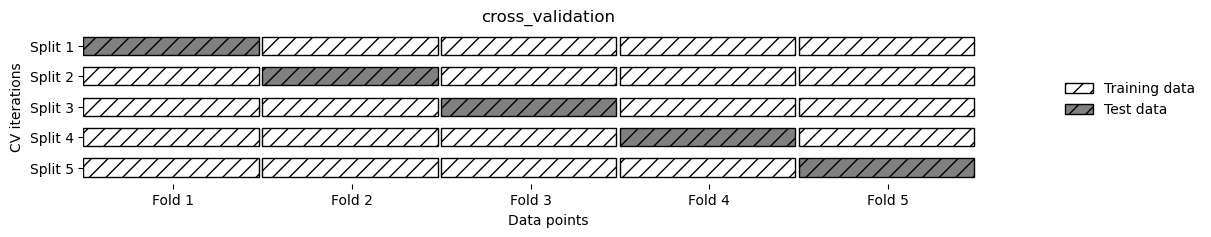

In [34]:
import mglearn
mglearn.plots.plot_cross_validation()

# Cross-Validation in scikit-learn
Cross-validation is implemented in scikit-learn using the cross_val_score func‐
tion from the model_selection module. The parameters of the cross_val_score
function are the model we want to evaluate, the training data, and the ground-truth
labels. Let’s evaluate LogisticRegression on the iris dataset

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [36]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg,iris.data,iris.target)
print("Cross Validation score:{}".format(scores))

Cross Validation score:[0.96666667 1.         0.93333333 0.96666667 1.        ]


By default, cross_val_score performs three-fold cross-validation, returning three
accuracy values. We can change the number of folds used by changing the cv parame‐
ter:

In [37]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


A common way to summarize the cross-validation accuracy is to compute the mean:

In [38]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Using the mean cross-validation we can conclude that we expect the model to be
around 97% accurate on average. Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

# Benefits of Cross-Validation
There are several benefits to using cross-validation instead of a single split into a
training and a test set. First, remember that train_test_split performs a random
split of the data. Imagine that we are “lucky” when randomly splitting the data, and
all examples that are hard to classify end up in the training set. In that case, the test
set will only contain “easy” examples, and our test set accuracy will be unrealistically
high. Conversely, if we are “unlucky,” we might have randomly put all the hard-toclassify examples in the test set and consequently obtain an unrealistically low score.  
However, when using cross-validation, each example will be in the training set exactly
once: each example is in one of the folds, and each fold is the test set once. Therefore,
the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.  
Having multiple splits of the data also provides some information about how sensi‐
tive our model is to the selection of the training dataset. For the iris dataset, we saw
accuracies between 90% and 100%. This is quite a range, and it provides us with an
idea about how the model might perform in the worst case and best case scenarios
when applied to new data.  
Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models.  
The main disadvantage of cross-validation is increased computational cost. As we are
now training k models instead of a single model, cross-validation will be roughly k
times slower than doing a single split of the data.

**Note:** It is important to keep in mind that cross-validation is not a way to
build a model that can be applied to new data. Cross-validation
does not return a model. When calling cross_val_score, multiple
models are built internally, but the purpose of cross-validation is
only to evaluate how well a given algorithm will generalize when
trained on a specific dataset.

# Stratified k-Fold Cross-Validation and Other Strategies
Splitting the dataset into k folds by starting with the first one-k-th part of the data, as
described in the previous section, might not always be a good idea. For example, let’s
have a look at the iris dataset:

In [39]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the first third of the data is the class 0, the second third is the class 1,
and the last third is the class 2. Imagine doing three-fold cross-validation on this
dataset. The first fold would be only class 0, so in the first split of the data, the test set
would be only class 0, and the training set would be only classes 1 and 2. As the
classes in training and test sets would be different for all three splits, the three-fold
cross-validation accuracy would be zero on this dataset. That is not very helpful, as
we can do much better than 0% accuracy on iris.

As the simple k-fold strategy fails here, scikit-learn does not use it for classifica‐
tion, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset, as illustrated in figure below

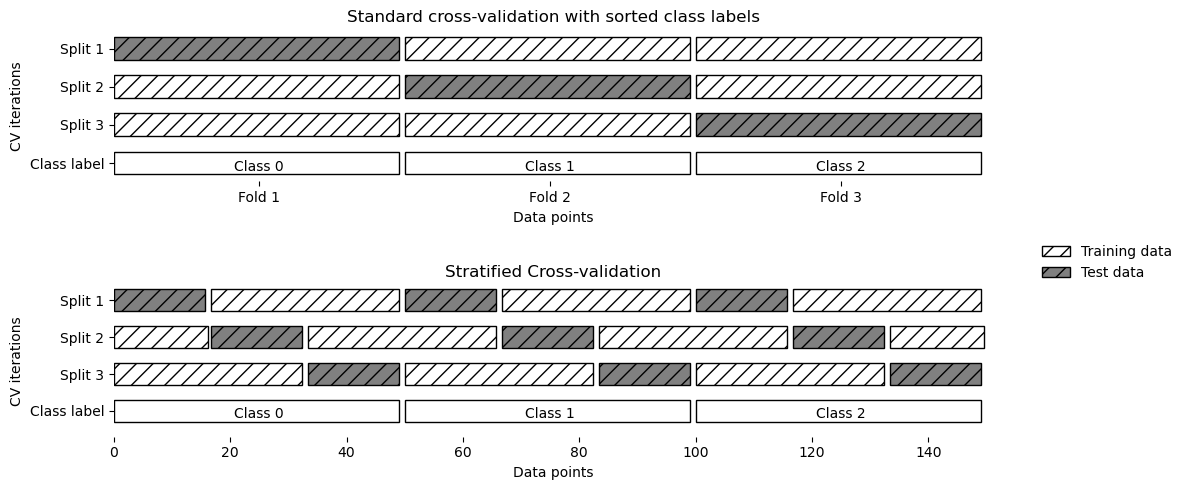

In [40]:
mglearn.plots.plot_stratified_cross_validation()

For example, if 90% of your samples belong to class A and 10% of your samples
belong to class B, then stratified cross-validation ensures that in each fold, 90% of
samples belong to class A and 10% of samples belong to class B.
It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance. In the case of only 10% of samples belonging to class B,
using standard k-fold cross-validation it might easily happen that one fold only con‐
tains samples of class A. Using this fold as a test set would not be very informative
about the overall performance of the classifier.
For regression, scikit-learn uses the standard k-fold cross-validation by default. It
would be possible to also try to make each fold representative of the different values
the regression target has, but this is not a commonly used strategy and would be sur‐
prising to most users.

# More control over cross-validation
We saw earlier that we can adjust the number of folds that are used in
cross_val_score using the cv parameter. However, scikit-learn allows for much
finer control over what happens during the splitting of the data by providing a crossvalidation splitter as the cv parameter. For most use cases, the defaults of k-fold crossvalidation for regression and stratified k-fold for classification work well, but there
are some cases where you might want to use a different strategy. Say, for example, we
want to use the standard k-fold cross-validation on a classification dataset to repro‐
duce someone else’s results. To do this, we first have to import the KFold splitter class
from the model_selection module and instantiate it with the number of folds we
want to use:

In [41]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

Then, we can pass the kfold splitter object as the cv parameter to cross_val_score:

In [42]:
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


This way, we can verify that it is indeed a really bad idea to use three-fold (nonstrati‐
fied) cross-validation on the iris dataset:

In [43]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


**Remember:** each fold corresponds to one of the classes in the iris dataset, and so
nothing can be learned. Another way to resolve this problem is to shuffle the data
instead of stratifying the folds, to remove the ordering of the samples by label. We can
do that by setting the shuffle parameter of KFold to True. If we shuffle the data, we
also need to fix the random_state to get a reproducible shuffling. Otherwise, each run
of cross_val_score would yield a different result, as each time a different split would
be used (this might not be a problem, but can be surprising). Shuffling the data before
splitting it yields a much better result:

In [44]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


# Leave-one-out cross-validation
Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better esti‐
mates on small datasets:

In [45]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


# Shuffle-split cross-validation
Another, very flexible strategy for cross-validation is shuffle-split cross-validation. In
shuffle-split cross-validation, each split samples train_size many points for the
training set and test_size many (disjoint) point for the test set. This splitting is
repeated n_iter times. Figure below illustrates running four iterations of splitting a
dataset consisting of 10 points, with a training set of 5 points and test sets of 2 points
each (you can use integers for train_size and test_size to use absolute sizes for
these sets, or floating-point numbers to use fractions of the whole dataset):

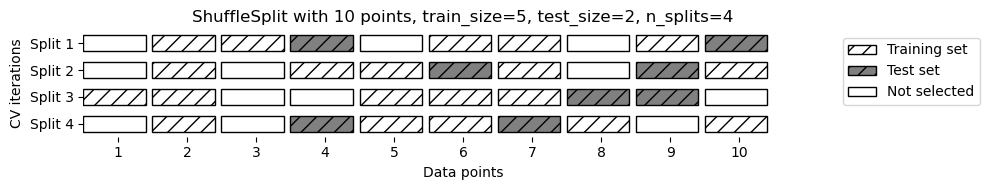

In [46]:
mglearn.plots.plot_shuffle_split()

# Cross-validation with groups
Another very common setting for cross-validation is when there are groups in the
data that are highly related. Say you want to build a system to recognize emotions
from pictures of faces, and you collect a dataset of pictures of 100 people where each
person is captured multiple times, showing various emotions. The goal is to build a
classifier that can correctly identify emotions of people not in the dataset. You could
use the default stratified cross-validation to measure the performance of a classifier
here. However, it is likely that pictures of the same person will be in both the training
and the test set. It will be much easier for a classifier to detect emotions in a face that
is part of the training set, compared to a completely new face. To accurately evaluate
the generalization to new faces, we must therefore ensure that the training and test
sets contain images of different people.  
To achieve this, we can use GroupKFold, which takes an array of groups as argument
that we can use to indicate which person is in the image. The groups array here indi‐
cates groups in the data that should not be split when creating the training and test
sets, and should not be confused with the class label.
This example of groups in the data is common in medical applications, where you
might have multiple samples from the same patient, but are interested in generalizing
to new patients. Similarly, in speech recognition, you might have multiple recordings
of the same speaker in your dataset, but are interested in recognizing speech of new
speakers.  
The following is an example of using a synthetic dataset with a grouping given by the
groups array. The dataset consists of 12 data points, and for each of the data points,
groups specifies which group (think patient) the point belongs to. The groups specify
that there are four groups, and the first three samples belong to the first group, the
next four samples belong to the second group, and so on:

In [48]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold, cross_val_score
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


The samples don’t need to be ordered by group; we just did this for illustration pur‐
poses. The splits that are calculated based on these labels are visualized in figure below. As you can see, for each split, each group is either entirely in the training set or
entirely in the test set:

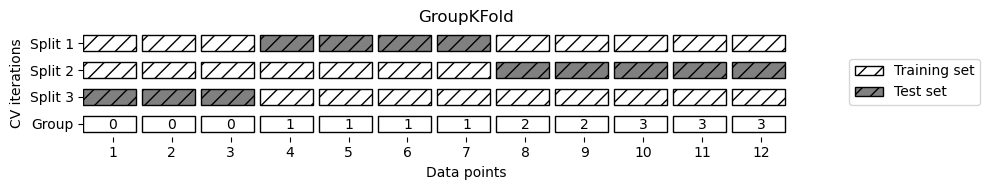

In [55]:
mglearn.plot_cross_validation.plot_group_kfold()

# Grid Search
Now that we know how to evaluate how well a model generalizes, we can take the
next step and improve the model’s generalization performance by tuning its parame‐
ters. it is important to understand what the parameters mean
before trying to adjust them. Finding the values of the important parameters of a
model (the ones that provide the best generalization performance) is a tricky task, but
necessary for almost all models and datasets. Because it is such a common task, there
are standard methods in scikit-learn to help you with it. The most commonly used
method is grid search, which basically means trying all possible combinations of the
parameters of interest.  


# Simple Grid Search
We can implement a simple grid search just as for loops over the two parameters,
training and evaluating a classifier for each combination:

In [58]:
# naive grid search implementation
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set: {}  size of test set: {}".format(
    X_train.shape[0],X_test.shape[0]))
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        # for each combination of parameter, train on SVC
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        # evaluate the SVC on test set
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameter = {'C': C,'gamma':gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameter:{}".format(best_parameter))

Size of training set: 112  size of test set: 38
Best score: 0.97
Best parameter:{'C': 100, 'gamma': 0.001}


# The Danger of Overfitting the Parameters and the Validation Set
Given this result, we might be tempted to report that we found a model that performs
with 97% accuracy on our dataset. However, this claim could be overly optimistic (or
just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is. This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.
One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters. figure shows what this looks like:

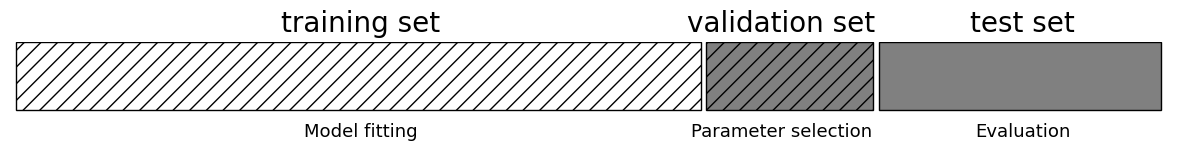

In [59]:
mglearn.plots.plot_threefold_split()

After selecting the best parameters using the validation set, we can rebuild a model
using the parameter settings we found, but now training on both the training data
and the validation data. This way, we can use as much data as possible to build our
model. This leads to the following implementation:

In [60]:
# split data into train+validation set and test set
X_trainval,X_test,y_trainval,y_test=train_test_split(
     iris.data,iris.target,random_state=0)
# split the train+val set into training and validation set
X_train,X_valid,y_train,y_valid=train_test_split(
      X_trainval,y_trainval,random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)
        if score > best_score:
            best_score=score
            best_parameter={'C':C,'gamma':gamma}
# rebuild the model on the combined training and validation set,
# and evaluate it on test set
svm = SVC(**best_parameter)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameter: ',best_parameter)
print("Test set score with best parameter: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameter:  {'C': 10, 'gamma': 0.001}
Test set score with best parameter: 0.92


The best score on the validation set is 96%: slightly lower than before, probably
because we used less data to train the model (X_train is smaller now because we split
our dataset twice). However, the score on the test set—the score that actually tells us
how well we generalize—is even lower, at 92%. So we can only claim to classify new
data 92% correctly, not 97% correctly as we thought before!
The distinction between the training set, validation set, and test set is fundamentally
important to applying machine learning methods in practice. Any choices made
based on the test set accuracy “leak” information from the test set into the model.
Therefore, it is important to keep a separate test set, which is only used for the final
evaluation. It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. Strictly speaking, evaluat‐
ing more than one model on the test set and choosing the better of the two will result
in an overly optimistic estimate of how accurate the model is.

# Grid Search with Cross-Validation
While the method of splitting the data into a training, a validation, and a test set that
we just saw is workable, and relatively commonly used, it is quite sensitive to how
exactly the data is split. From the output of the previous code snippet we can see that
GridSearchCV selects 'C': 10, 'gamma': 0.001 as the best parameters, while the
output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the
best parameters. For a better estimate of the generalization performance, instead of
using a single split into a training and a validation set, we can use cross-validation to
evaluate the performance of each parameter combination. This method can be coded
up as follows:

In [69]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

To evaluate the accuracy of the SVM using a particular setting of C and gamma using
five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine,
the main downside of the use of cross-validation is the time it takes to train all these
models.
The following visualization below illustrates how the best parameter setting is
selected in the preceding code:

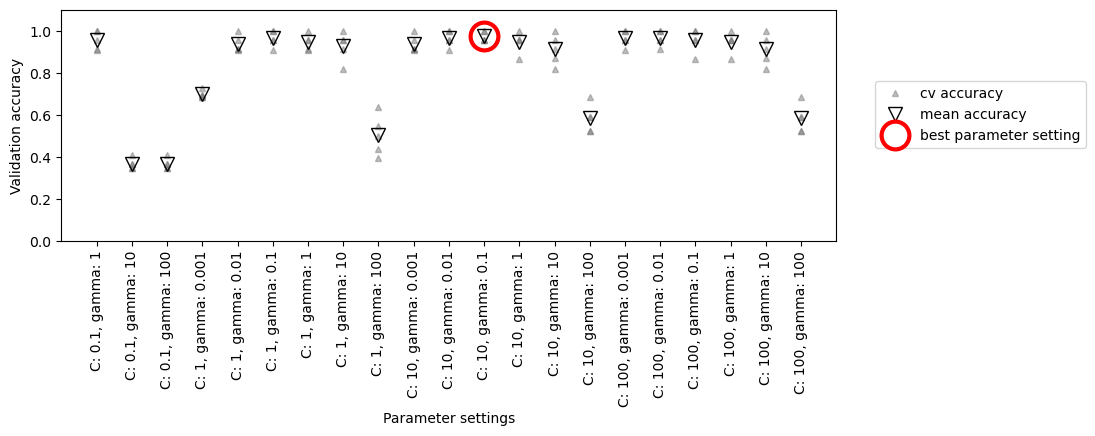

In [70]:
mglearn.plots.plot_cross_val_selection()

For each parameter setting (only a subset is shown), five accuracy values are compu‐
ted, one for each split in the cross-validation. Then the mean validation accuracy is
computed for each parameter setting. The parameters with the highest mean valida‐
tion accuracy are chosen, marked by the circle.

**Note**: As we said earlier, cross-validation is a way to evaluate a given algo‐
rithm on a specific dataset. However, it is often used in conjunction
with parameter search methods like grid search. For this reason,
many people use the term cross-validation colloquially to refer to
grid search with cross-validation.

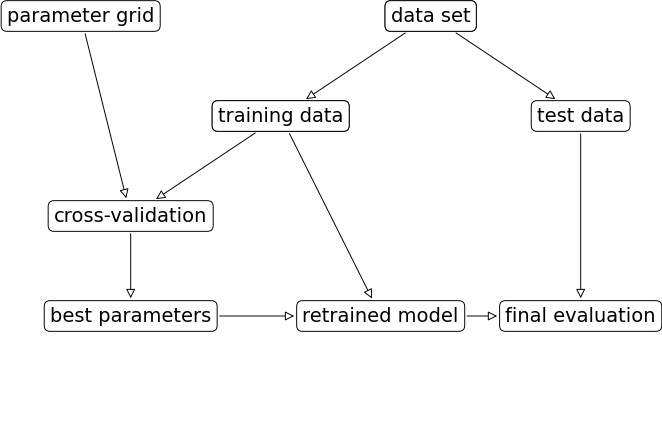

In [71]:
mglearn.plots.plot_grid_search_overview()

Because grid search with cross-validation is such a commonly used method to adjust
parameters, scikit-learn provides the GridSearchCV class, which implements it in
the form of an estimator. To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then per‐
form all the necessary model fits. The keys of the dictionary are the names of parame‐
ters we want to adjust (as given when constructing the model—in this case, C and
gamma), and the values are the parameter settings we want to try out. Trying the val‐
ues 0.001, 0.01, 0.1, 1, 10, and 100 for C and gamma translates to the following
dictionary:

In [72]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma': [0.001,0.01,0.1,1,10,100]}
print('Parameter grid:\n{}'.format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


We can now instantiate the GridSearchCV class with the model (SVC), the parameter
grid to search (param_grid), and the cross-validation strategy we want to use (say,
five-fold stratified cross-validation):

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(),param_grid,cv=5)

GridSearchCV will use cross-validation in place of the split into a training and valida‐
tion set that we used before. However, we still need to split the data into a training
and a test set, to avoid overfitting the parameters:

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=0)

The grid_search object that we created behaves just like a classifier; we can call the
standard methods fit, predict, and score on it.1 However, when we call fit, it will
run cross-validation for each combination of parameters we specified in param_grid:

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. What happens in fit is therefore
equivalent to the result of the In[21] code we saw at the beginning of this section. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods. To evaluate how well the best found
parameters generalize, we can call score on the test set:

In [76]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


Choosing the parameters using cross-validation, we actually found a model that ach‐
ieves 97% accuracy on the test set. The important thing here is that we did not use the
test set to choose the parameters. The parameters that were found are scored in the best_params_ attribute, and the best cross-validation accuracy (the mean accuracy
over the different splits for this parameter setting) is stored in best_score_:

In [77]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [78]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [79]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011455,0.012419,0.004941,0.004043,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.003097,0.003797,0.001600,0.003199,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.003129,0.006258,0.001612,0.003224,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.003121,0.006242,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.003125,0.006250,0.003129,0.006258,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
